In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading our Dataset
df=pd.read_csv('/content/drive/MyDrive/Project/cardio_train.csv')

In [ ]:
#Visualising our Data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Checking the Datatypes
df.dtypes


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
#Checking the count of NULL values in each column
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#Checking for count of duplicate rows in the entire dataset
df.duplicated().sum()

0

In [ ]:
#Identifying the columns with constant values
df.apply(pd.Series.nunique)

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
df.shape

(70000, 13)

In [ ]:
#Here age was in days, so calculating age in years
df['years'] = (df['age'] / 365).round().astype('int')

In [ ]:
#Droping the age column
df.drop('age',axis=1, inplace=True)

In [ ]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


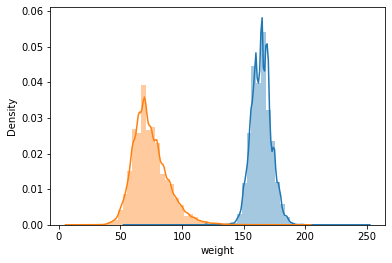

In [ ]:
#Checking for outliers/skew
sns.distplot(df['height'])
sns.distplot(df['weight'])





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


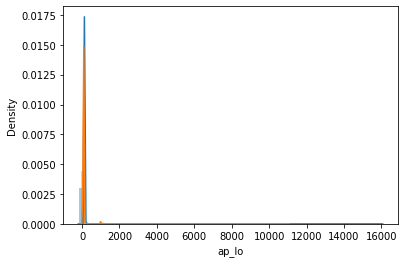

In [ ]:
#Checking for outliers/skew
sns.distplot(df['ap_hi'])
sns.distplot(df['ap_lo'])

In [ ]:
#Skew and outliers are present so need to remove them
min_threshold, max_threshold=df.weight.quantile([0.001,0.999])
min_threshold, max_threshold
df=df[(df.weight<max_threshold) & (df.weight>min_threshold)]

min_threshold, max_threshold=df.height.quantile([0.003,0.997])
min_threshold, max_threshold
df=df[(df.height<max_threshold) & (df.height>min_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


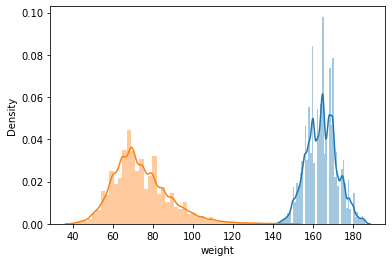

In [ ]:
sns.distplot(df['height'])
sns.distplot(df['weight'])

In [ ]:
#Skew and outliers are present so need to remove them
min_threshold, max_threshold=df.ap_hi.quantile([0.00268,0.9994])
min_threshold, max_threshold
df=df[(df.ap_hi<max_threshold) & (df.ap_hi>min_threshold)]

min_threshold, max_threshold=df.ap_lo.quantile([0.0008,0.985])
min_threshold, max_threshold
df=df[(df.ap_lo<max_threshold) & (df.ap_lo>min_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


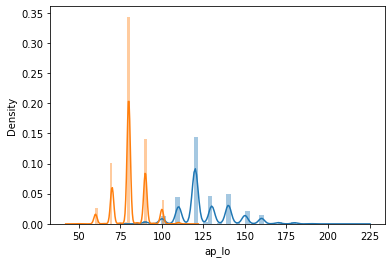

In [ ]:
sns.distplot(df['ap_hi'])
sns.distplot(df['ap_lo'])

In [ ]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000,67809.000000
mean,49979.414724,1.347358,164.413780,74.005607,126.490333,81.187600,1.363904,1.225280,0.087732,0.053135,0.803551,0.493489,53.326638
std,28854.193278,0.476134,7.596821,13.923053,16.356011,9.113012,0.678501,0.571186,0.282906,0.224303,0.397315,0.499961,6.766735
min,0.000000,1.000000,143.000000,41.000000,80.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,24988.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50036.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74879.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,186.000000,149.000000,220.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [ ]:
df['gender'].value_counts()

1    44255
2    23554
Name: gender, dtype: int64

In [ ]:
#We assume that males are taller than females, so the mean of males will be more.
#Here the mean of '2' is more so we can consider '2' as male and '1' as female.
df.groupby('gender')['height'].mean()

gender
1    161.503356
2    169.882101
Name: height, dtype: float64

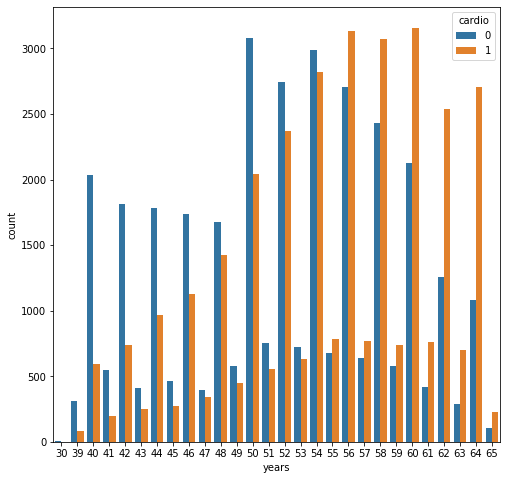

In [ ]:
#Here it is observed that after the age of 54 years, the number of people suffering from a cardiovascular disease is more compared to number of healthy people.
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 8
sns.countplot(x='years', hue='cardio', data = df);

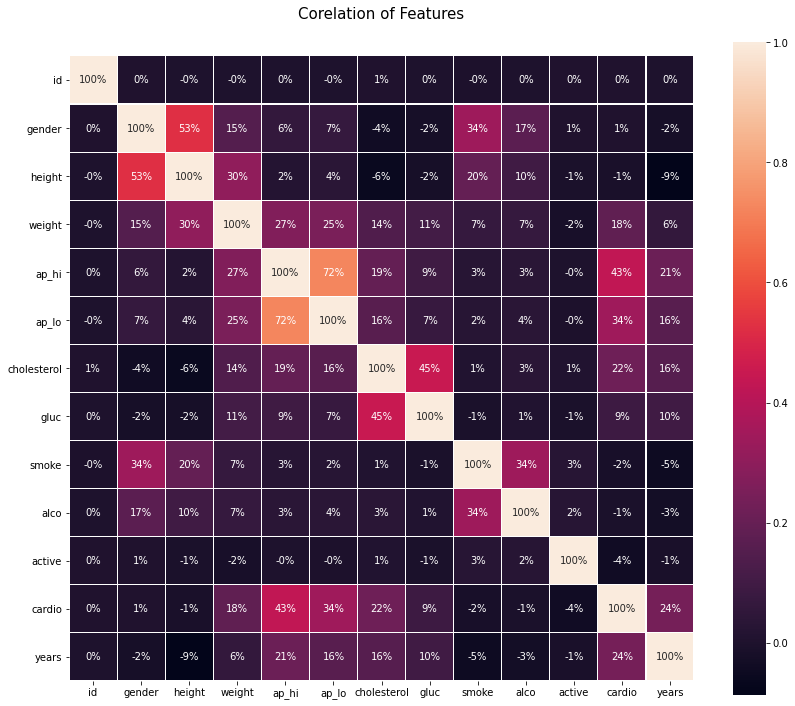

In [ ]:
#Plotting Correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Corelation of Features',y=1.05,size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0,square=True, fmt='.0%', linecolor='white', annot=True)

**The major contributing factors for developing a cardiovascular disease are: -**

*   High Systolic Blood Pressure (43%)
*   High Diastolic Blood Pressure (34%)

*   years (24%)
*   Cholesterol level (22%)

*   Weight (18%) 









	
	

	

